In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

print(train.shape,test.shape)

(357, 11) (90, 10)


In [2]:
full = train.append(test, ignore_index = True)
full.head()

/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,categories,genres,id,is_free,playtime_forever,price,purchase_date,release_date,tags,total_negative_reviews,total_positive_reviews
0,"Single-player,Steam Trading Cards,Steam Cloud","Adventure,Casual,Indie",0,False,0.000000,3700.0,"Jul 2, 2018","10 Dec, 2013","Indie,Adventure,Story Rich,Casual,Atmospheric,...",96.0,372.0
1,"Single-player,Partial Controller Support",RPG,1,True,0.016667,0.0,"Nov 26, 2016","12 Aug, 2015","Mod,Utilities,RPG,Game Development,Singleplaye...",0.0,23.0
2,"Single-player,Full controller support,Steam Tr...","Adventure,Casual,Indie",2,False,0.000000,5000.0,"Jul 2, 2018","28 Jan, 2014","Point & Click,Adventure,Story Rich,Comedy,Indi...",663.0,3018.0
3,"Single-player,Multi-player,Steam Achievements,...","Action,RPG",3,False,1.533333,9900.0,"Nov 28, 2016","31 Mar, 2010","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",1746.0,63078.0
4,"Single-player,Co-op,Steam Achievements,Full co...","Action,Indie,Strategy",4,False,22.333333,4800.0,"Mar 4, 2018","30 Jul, 2012","Tower Defense,Co-op,Action,Strategy,Online Co-...",523.0,8841.0


In [3]:
full['total_negative_reviews']=full['total_negative_reviews'].fillna(full['total_negative_reviews'].median())
full['total_positive_reviews']=full['total_positive_reviews'].fillna(full['total_positive_reviews'].median())

In [4]:
import datetime
full['purchase_date'] = pd.to_datetime(full['purchase_date'])
date2=datetime.datetime.strptime('2008-01-01',"%Y-%m-%d")
full['pur_timestamp'] =  full['purchase_date'].apply(lambda x:(x - date2).days)

In [5]:
full['pur_timestamp']=full['pur_timestamp'].fillna(full['pur_timestamp'].mode()[0])
full.isnull().sum()

categories                 0
genres                     0
id                         0
is_free                    0
playtime_forever          90
price                      0
purchase_date              4
release_date               0
tags                       0
total_negative_reviews     0
total_positive_reviews     0
pur_timestamp              0
dtype: int64

In [6]:
full['release_date'] = pd.to_datetime(full['release_date'])
date2=datetime.datetime.strptime('2008-01-01',"%Y-%m-%d")
full['re_timestamp'] =  full['release_date'].apply(lambda x:(x - date2).days)

In [7]:
full.head()

,categories,genres,id,is_free,playtime_forever,price,purchase_date,release_date,tags,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp
0,"Single-player,Steam Trading Cards,Steam Cloud","Adventure,Casual,Indie",0,False,0.000000,3700.0,2018-07-02,2013-12-10,"Indie,Adventure,Story Rich,Casual,Atmospheric,...",96.0,372.0,3835.0,2170
1,"Single-player,Partial Controller Support",RPG,1,True,0.016667,0.0,2016-11-26,2015-08-12,"Mod,Utilities,RPG,Game Development,Singleplaye...",0.0,23.0,3252.0,2780
2,"Single-player,Full controller support,Steam Tr...","Adventure,Casual,Indie",2,False,0.000000,5000.0,2018-07-02,2014-01-28,"Point & Click,Adventure,Story Rich,Comedy,Indi...",663.0,3018.0,3835.0,2219
3,"Single-player,Multi-player,Steam Achievements,...","Action,RPG",3,False,1.533333,9900.0,2016-11-28,2010-03-31,"Medieval,RPG,Open World,Strategy,Sandbox,Actio...",1746.0,63078.0,3254.0,820
4,"Single-player,Co-op,Steam Achievements,Full co...","Action,Indie,Strategy",4,False,22.333333,4800.0,2018-03-04,2012-07-30,"Tower Defense,Co-op,Action,Strategy,Online Co-...",523.0,8841.0,3715.0,1672


In [8]:
full['timestramp']=full['pur_timestamp']-full['re_timestamp']

In [9]:
full.isnull().sum()

categories                 0
genres                     0
id                         0
is_free                    0
playtime_forever          90
price                      0
purchase_date              4
release_date               0
tags                       0
total_negative_reviews     0
total_positive_reviews     0
pur_timestamp              0
re_timestamp               0
timestramp                 0
dtype: int64

In [10]:
categoriesDf = full["categories"].str.get_dummies("," )

genresDf = full["genres"].str.get_dummies("," )

tagsDf = full["tags"].str.get_dummies("," )

#full = pd.concat([full,categoriesDf],axis = 1)
#full.drop('categories',axis = 1, inplace = True)

categoriesDf = pd.concat([categoriesDf,genresDf],axis = 1)
#full.drop('genres',axis = 1, inplace = True)

#categoriesDf = pd.concat([categoriesDf,tagsDf],axis = 1)
#full.drop('tags',axis = 1, inplace = True)
categoriesDf.head()

,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,...,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
full = pd.concat([full,categoriesDf],axis = 1)

In [12]:
full.head()

,categories,genres,id,is_free,playtime_forever,price,purchase_date,release_date,tags,total_negative_reviews,...,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent
0,"Single-player,Steam Trading Cards,Steam Cloud","Adventure,Casual,Indie",0,False,0.000000,3700.0,2018-07-02,2013-12-10,"Indie,Adventure,Story Rich,Casual,Atmospheric,...",96.0,...,0,0,0,0,0,0,0,0,0,0
1,"Single-player,Partial Controller Support",RPG,1,True,0.016667,0.0,2016-11-26,2015-08-12,"Mod,Utilities,RPG,Game Development,Singleplaye...",0.0,...,0,0,1,0,0,0,0,0,0,0
2,"Single-player,Full controller support,Steam Tr...","Adventure,Casual,Indie",2,False,0.000000,5000.0,2018-07-02,2014-01-28,"Point & Click,Adventure,Story Rich,Comedy,Indi...",663.0,...,0,0,0,0,0,0,0,0,0,0
3,"Single-player,Multi-player,Steam Achievements,...","Action,RPG",3,False,1.533333,9900.0,2016-11-28,2010-03-31,"Medieval,RPG,Open World,Strategy,Sandbox,Actio...",1746.0,...,0,0,1,0,0,0,0,0,0,0
4,"Single-player,Co-op,Steam Achievements,Full co...","Action,Indie,Strategy",4,False,22.333333,4800.0,2018-03-04,2012-07-30,"Tower Defense,Co-op,Action,Strategy,Online Co-...",523.0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
full.drop(['categories','genres','tags'],axis = 1, inplace = True)

full.head()

,id,is_free,playtime_forever,price,purchase_date,release_date,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,...,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent
0,0,False,0.000000,3700.0,2018-07-02,2013-12-10,96.0,372.0,3835.0,2170,...,0,0,0,0,0,0,0,0,0,0
1,1,True,0.016667,0.0,2016-11-26,2015-08-12,0.0,23.0,3252.0,2780,...,0,0,1,0,0,0,0,0,0,0
2,2,False,0.000000,5000.0,2018-07-02,2014-01-28,663.0,3018.0,3835.0,2219,...,0,0,0,0,0,0,0,0,0,0
3,3,False,1.533333,9900.0,2016-11-28,2010-03-31,1746.0,63078.0,3254.0,820,...,0,0,1,0,0,0,0,0,0,0
4,4,False,22.333333,4800.0,2018-03-04,2012-07-30,523.0,8841.0,3715.0,1672,...,0,0,0,0,0,0,0,1,0,0


In [14]:
#full.drop('Unnamed: 0',axis = 1, inplace = True)


In [15]:
def function(a): 
    if a == 0: 
        return 1
    else: 
        return 0
full['free'] = full['price'].map(lambda x: function(x)) 
full.head()

,id,is_free,playtime_forever,price,purchase_date,release_date,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
0,0,False,0.000000,3700.0,2018-07-02,2013-12-10,96.0,372.0,3835.0,2170,...,0,0,0,0,0,0,0,0,0,0
1,1,True,0.016667,0.0,2016-11-26,2015-08-12,0.0,23.0,3252.0,2780,...,0,1,0,0,0,0,0,0,0,1
2,2,False,0.000000,5000.0,2018-07-02,2014-01-28,663.0,3018.0,3835.0,2219,...,0,0,0,0,0,0,0,0,0,0
3,3,False,1.533333,9900.0,2016-11-28,2010-03-31,1746.0,63078.0,3254.0,820,...,0,1,0,0,0,0,0,0,0,0
4,4,False,22.333333,4800.0,2018-03-04,2012-07-30,523.0,8841.0,3715.0,1672,...,0,0,0,0,0,0,1,0,0,0


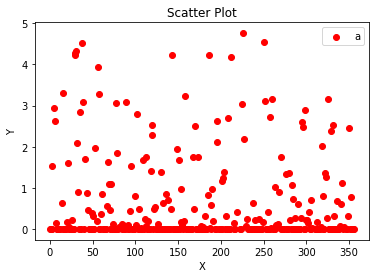

In [17]:
#导入必要的模块  
import numpy as np  
import matplotlib.pyplot as plt  
#产生测试数据  
x = full[full['playtime_forever']<5]['id']
y = full[full['playtime_forever']<5]['playtime_forever']
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
#设置标题  
ax1.set_title('Scatter Plot')  
#设置X轴标签  
plt.xlabel('X')  
#设置Y轴标签  
plt.ylabel('Y')  
#画散点图  
ax1.scatter(x,y,c = 'r',marker = 'o')  
#设置图标  
plt.legend('ax1')  
#显示所画的图  
plt.show()  

In [18]:
full.drop(['is_free','purchase_date','release_date'],axis = 1, inplace = True)

In [19]:
full.head()

,id,playtime_forever,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
0,0,0.000000,3700.0,96.0,372.0,3835.0,2170,1665.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.016667,0.0,0.0,23.0,3252.0,2780,472.0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,0.000000,5000.0,663.0,3018.0,3835.0,2219,1616.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.533333,9900.0,1746.0,63078.0,3254.0,820,2434.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,22.333333,4800.0,523.0,8841.0,3715.0,1672,2043.0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
full['playtime_forever']= full['playtime_forever'].apply(lambda x: 0 if x<0.5 else 1 if 0.5<x<1 else 2 if 1<x<5 else 3)

In [21]:
full.head()

,id,playtime_forever,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
0,0,0,3700.0,96.0,372.0,3835.0,2170,1665.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,0.0,23.0,3252.0,2780,472.0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,0,5000.0,663.0,3018.0,3835.0,2219,1616.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,9900.0,1746.0,63078.0,3254.0,820,2434.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,3,4800.0,523.0,8841.0,3715.0,1672,2043.0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [22]:
a = full['playtime_forever']
a = pd.DataFrame(a)

In [23]:
full.drop(['playtime_forever'],axis = 1, inplace = True)

In [24]:
full = pd.concat([full,a],axis = 1)

In [25]:
full

,id,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,Commentary available,...,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free,playtime_forever
0,0,3700.0,96.0,372.0,3835.0,2170,1665.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,23.0,3252.0,2780,472.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,5000.0,663.0,3018.0,3835.0,2219,1616.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9900.0,1746.0,63078.0,3254.0,820,2434.0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4,4,4800.0,523.0,8841.0,3715.0,1672,2043.0,0,1,0,...,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,85,5000.0,516.0,9334.0,3734.0,1968,1766.0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
443,86,3600.0,176.0,1245.0,3714.0,622,3092.0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
444,87,11200.0,6350.0,33128.0,3701.0,2051,1650.0,0,0,0,...,0,0,0,1,0,1,0,0,0,3
445,88,0.0,0.0,5.0,3610.0,3457,153.0,0,1,0,...,1,0,0,1,1,1,0,0,1,3


In [26]:
full1 = full.iloc[0:300,:]

In [27]:
full1['playtime_forever'] = full1['playtime_forever'].apply(int)
full1.drop('id',axis = 1, inplace = True)
full1 = full1.rename(columns = {"price":"300","total_negative_reviews":"56"})

/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
full1.to_csv('muiltclass.csv',index=False)

In [29]:
full2 = full.iloc[300:357,:]

In [30]:
full2.head()

,id,price,total_negative_reviews,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,Commentary available,...,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free,playtime_forever
300,300,4900.0,155.0,978.0,4007.0,3688,319.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
301,301,2100.0,52.0,201.0,3896.0,3117,779.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
302,302,8800.0,57.0,440.0,3788.0,3864,-76.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,303,400.0,123.0,1266.0,3635.0,2883,752.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
304,304,3700.0,622.0,8255.0,3846.0,2780,1066.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
full2['playtime_forever'] = full2['playtime_forever'].apply(int)
full2.drop('id',axis = 1, inplace = True)
full2 = full2.rename(columns = {"price":"57","total_negative_reviews":"56"})

/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
full2.head()

,57,56,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,...,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free,playtime_forever
300,4900.0,155.0,978.0,4007.0,3688,319.0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
301,2100.0,52.0,201.0,3896.0,3117,779.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
302,8800.0,57.0,440.0,3788.0,3864,-76.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,400.0,123.0,1266.0,3635.0,2883,752.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
304,3700.0,622.0,8255.0,3846.0,2780,1066.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
full2.to_csv('muiltclass_test.csv',index=False)

In [34]:
import tensorflow as tf 
import numpy as np

IRIS_TRAINING = "./muiltclass.csv"
IRIS_TEST ="./muiltclass_test.csv"


/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lyrehee/anaconda2/envs/pyth

In [42]:
training_set = tf.contrib.learn.datasets.base.load_csv_with_header( 
filename = IRIS_TRAINING, 
target_dtype = np.int64, 
features_dtype = np.float64, 
target_column = 56)

test_set = tf.contrib.learn.datasets.base.load_csv_with_header( 
filename=IRIS_TEST, 
target_dtype=np.int64, 
features_dtype=np.float64, 
target_column = 56)

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=56)]

classifier1 = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
hidden_units=[10,20,10], 
n_classes=4, 
model_dir="./5001-fin")

classifier1.fit(x=training_set.data, 
y=training_set.target, 
steps=3000)

accuracy_score = classifier1.evaluate(x=test_set.data, y=test_set.target)['accuracy'] 
print("Accuracy: {0:f}".format(accuracy_score))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a46f797f0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './5001-fin'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving check

INFO:tensorflow:Starting evaluation at 2019-11-30T17:27:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./5001-fin/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-30-17:27:39
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.6666667, global_step = 3000, loss = 2728.687
Accuracy: 0.666667


In [43]:
pred = full.iloc[357:,1:57]

In [44]:
pred= pred.rename(columns = {"price":"90","total_negative_reviews":"57"})

In [45]:
#pred = np.array(pred,dtype=np.float32)

In [46]:
pred

,90,57,total_positive_reviews,pur_timestamp,re_timestamp,timestramp,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,...,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Utilities,Violent,free
357,3500.0,1122.0,2607.0,3953.0,1603,2350.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,11600.0,2235.0,5762.0,4218.0,3766,452.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
359,2100.0,133.0,687.0,4214.0,3366,848.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
360,3600.0,39.0,67.0,3682.0,-168,3850.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
361,3400.0,3708.0,40344.0,3342.0,2060,1282.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,5000.0,516.0,9334.0,3734.0,1968,1766.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,3600.0,176.0,1245.0,3714.0,622,3092.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,11200.0,6350.0,33128.0,3701.0,2051,1650.0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
445,0.0,0.0,5.0,3610.0,3457,153.0,0,1,0,1,...,0,1,0,0,1,1,1,0,0,1


In [47]:
predictions = list(classifier1.predict(pred))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./5001-fin/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
predictions

[0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 0,
 2,
 0,
 0]

In [49]:
for i in range(len(predictions)):
    if predictions[i] == 1:
        predictions[i] = 0.7
    if predictions[i] == 3:
        predictions[i] = 10


In [50]:
subm = pd.read_csv("samplesubmission.csv")
subm.drop("playtime_forever",axis = 1,inplace = True)
list1 = pd.DataFrame(predictions)
result = pd.concat([subm,list1],axis = 1)
result.columns = ['id','playtime_forever']
result

,id,playtime_forever
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,2.0
...,...,...
85,85,0.0
86,86,0.0
87,87,2.0
88,88,0.0


In [51]:
result.to_csv('result_model2.csv',index=False)

In [52]:
test = pd.read_csv('./test.csv')
a = pd.merge(test,result)
a.to_csv("test_model2.csv")